## Import Dependencies and libraries

In [1]:
import numpy as np
import glob
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
import datetime, calendar

# Reading septentrio file and concatenate

### Duration

In [2]:
Start_date = input("Enter time in this format yyyy-mm-dd")
Start_date=datetime.datetime.strptime(Start_date, "%Y-%m-%d")
print(Start_date)
folder_name_first=int(Start_date.strftime('%y')+Start_date.strftime('%j'))
print(folder_name_first)

Enter time in this format yyyy-mm-dd 2021-01-02


2021-01-02 00:00:00
21002


In [3]:
End_date = input("Enter time in this format yyyy-mm-dd")
End_date=datetime.datetime.strptime(End_date, "%Y-%m-%d")
print(End_date)
folder_name_last=int(End_date.strftime('%y')+End_date.strftime('%j'))
print(folder_name_last)

Enter time in this format yyyy-mm-dd 2021-01-08


2021-01-08 00:00:00
21008


### Select year directory

In [4]:
root = tk.Tk()
root.withdraw()
#chose day folder 
file_path = filedialog.askdirectory()

In [11]:
for j in range(folder_name_first,folder_name_last+1):
    print('Files in folder {}'.format(str(j)))
    path = file_path + '/'+str(j)+'/*.ismr'
    files = glob.glob(path)
    print(len(files))

Files in folder 21002
24
Files in folder 21003
24
Files in folder 21004
24
Files in folder 21005
24
Files in folder 21006
24
Files in folder 21007
24
Files in folder 21008
24


In [14]:
files1=[]
for j in range(folder_name_first,folder_name_last+1):
    print('Files in folder {}'.format(str(j)))
    path = file_path + '/'+str(j)+'/*.ismr'
    files1 = files1 + glob.glob(path)
    print(len(files1))

Files in folder 21002
24
Files in folder 21003
48
Files in folder 21004
72
Files in folder 21005
96
Files in folder 21006
120
Files in folder 21007
144
Files in folder 21008
168


In [15]:
files1

['/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002A.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002B.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002C.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002D.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002E.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002F.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002G.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002H.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002I.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002J.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002K.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002L.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002M.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002N.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002O.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/SEPT002P.21_.ismr',
 '/media/bhuvi/Analysis/GNSS/2021/21002/

### Checking if all files exist

In [4]:
import os.path
import string
Folder_name= file_path[-5:]
print('Checking Folder: '+ Folder_name)
for filename in os.listdir(file_path):
    if filename.startswith(tuple("SEPT{doy}{hour_chr}.{year}_.ismr".format(doy=file_path[-3:],hour_chr=chr(i),year=file_path[-5:-3])  for i in range(65,91))) :
        print(filename +"=> File exist")
    else:
        print ("=X> File not exist")
        
        
        #print(filename)


Checking Folder: 21276
SEPT276A.21_.ismr=> File exist
SEPT276B.21_.ismr=> File exist
SEPT276C.21_.ismr=> File exist
SEPT276D.21_.ismr=> File exist
SEPT276E.21_.ismr=> File exist
SEPT276F.21_.ismr=> File exist
SEPT276G.21_.ismr=> File exist
SEPT276H.21_.ismr=> File exist
SEPT276I.21_.ismr=> File exist
SEPT276J.21_.ismr=> File exist
SEPT276K.21_.ismr=> File exist
SEPT276L.21_.ismr=> File exist
SEPT276M.21_.ismr=> File exist
SEPT276N.21_.ismr=> File exist
SEPT276O.21_.ismr=> File exist
SEPT276P.21_.ismr=> File exist
SEPT276Q.21_.ismr=> File exist
SEPT276R.21_.ismr=> File exist
SEPT276S.21_.ismr=> File exist
SEPT276T.21_.ismr=> File exist
SEPT276U.21_.ismr=> File exist
SEPT276V.21_.ismr=> File exist
SEPT276W.21_.ismr=> File exist
SEPT276X.21_.ismr=> File exist


### Concatination of files

In [17]:
f_out_name = input('Enter output file name: ')+'.ismr'
with open(f_out_name, "w") as outfile:
    for filename in files1:
        with open(filename) as infile:
            contents = infile.read()
            outfile.write(contents)


Enter output file name:  trial_file


In [6]:
!pwd

/home/bhuvi/PhD_Docs


# ISMR Data Processing

In [2]:
import pandas as pd
import datetime, calendar

In [3]:
f_out_name='trial_file.ismr'

In [4]:
data= pd.read_csv(f_out_name,header=None) #import concated file of the day

In [5]:
data.columns=['WN','TOW','SVID', 'Value', 'Azimuth', 'Elevation', 'Sig1', 'Total_S4_Sig1',
       'Correction_total_S4_Sig1', 'Phi01_Sig1_1', 'Phi03_Sig1_3',
       'Phi10_Sig1_10', 'Phi30_Sig1_30', 'Phi60_Sig1_60',
       'AvgCCD_Sig1_average_code-carrier_divergence',
       'SigmaCCD_Sig1_standard_deviation_code-carrier_divergence',
       'TEC_TOW-45s', 'dTEC_TOW-60s_TOW-45s', 'TEC_TOW-30s',
       'dTEC_TOW-45s_TOW-30s', 'TEC_TOW-15s', 'dTEC_TOW-30s_TOW-15s',
       'TEC_TOW', 'dTEC_TOW-15s_TOW', 'Sig1_lock_time',
       'sbf2ismr_version_number', 'Lock_time_second_frequency_TEC',
       'Averaged_C/N0_second_frequency_TEC_computation', 'SI_Index_Sig1',
       'SI_Index_Sig1_numerator', 'p_Sig1_spectral_slope', 'Average_Sig2_C/N0',
       'Total_S4_Sig2', 'Correction_total_S4_Sig2', 'Phi01_Sig2_1',
       'Phi03_Sig2_3', 'Phi10_Sig2_10', 'Phi30_Sig2_30', 'Phi60_Sig2_60',
       'AvgCCD_Sig2_average_code-carrier_divergence', 'SigmaCCD_Sig2_standard',
       'Sig2_lock', 'SI_Index_Sig2', 'SI_Index_Sig2_numerator', 'p_Sig2_phase',
       'Average_Sig3_C/N0_last_minute', 'Total_S4_Sig3',
       'Correction_total_S4_Sig3', 'Phi01_Sig3_1_phase', 'Phi03_Sig3_3_phase',
       'Phi10_Sig3_10_phase', 'Phi30_Sig3_30_phase', 'Phi60_Sig3_60_phase',
       'AvgCCD_Sig3_average_code-carrier_divergence',
       'SigmaCCD_Sig3_standard_deviation_code-carrier_divergence',
       'Sig3_lock_time', 'SI_Index_Sig3', 'SI_Index_Sig3_numerator',
       'p_Sig3_phase', 'T_Sig1_phase', 'T_Sig2_phase', 'T_Sig3_phase']

In [6]:
data

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,Phi60_Sig3_60_phase,AvgCCD_Sig3_average_code-carrier_divergence,SigmaCCD_Sig3_standard_deviation_code-carrier_divergence,Sig3_lock_time,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase
0,2138,518460,10,628,291.0,38.0,45.9,0.057,0.051,0.023,...,0.023,-1.221,0.061,3675,0.016,1.694,1.54,0.000060,0.000070,0.000045
1,2138,518460,13,628,37.0,4.0,35.3,0.259,0.172,0.051,...,nan,nan,nan,nan,nan,nan,nan,0.000298,nan,nan
2,2138,518460,15,628,42.0,38.0,45.0,0.069,0.056,0.022,...,nan,nan,nan,nan,nan,nan,nan,0.000060,nan,nan
3,2138,518460,16,628,281.0,6.0,35.8,0.217,0.163,0.072,...,nan,nan,nan,nan,nan,nan,nan,0.000465,nan,nan
4,2138,518460,18,628,27.0,60.0,46.3,0.050,0.048,0.015,...,nan,nan,nan,nan,nan,nan,nan,0.000027,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308243,2139,518400,130,628,101.0,15.0,39.2,0.145,0.109,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
308244,2139,518400,132,628,140.0,57.0,42.4,0.080,0.076,0.061,...,nan,nan,nan,nan,nan,nan,nan,0.000175,0.000142,nan
308245,2139,518400,136,628,262.0,9.0,37.6,0.120,0.132,0.086,...,nan,nan,nan,nan,nan,nan,nan,0.000597,0.000842,nan
308246,2139,518400,137,628,107.0,28.0,38.1,0.148,0.125,0.060,...,nan,nan,nan,nan,nan,nan,nan,0.000208,nan,nan


In [7]:
##some functions
def PRN_X(x):
    sv = 'M' + str(x)
    if 0 < x < 38:
        sv = 'G' + str(x)
    elif 37 < x < 62:
        sv = 'R' + str(x)
    elif 70 < x < 107:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'E' + str(x)
    elif 119 < x < 139:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'S' + str(x)
    elif 140 < x < 177:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'C' + str(x)
    elif 181 < x < 187:
        if len(str(x)) > 2:
            x = str(x)[-2:]
        sv = 'J' + str(x)
    return sv


###==============================================###
###
def WN_TOWtoTIME(WN, TOW):
    """"
    Convert gpsweek and gpseconds to time
    """
    import datetime, calendar
    WN = float(WN)
    TOW = float(TOW)
    # print(gpsweek,gpsseconds)
    leapseconds = 0   ####check 
    datetimeformat = "%Y-%m-%d %H:%M:%S"
    epoch = datetime.datetime.strptime("1980-01-06 00:00:00", datetimeformat)
    elapsed = datetime.timedelta(days=(WN * 7), seconds=(TOW))
    # return datetime.datetime.strftime(epoch + elapsed,datetimeformat)
    return elapsed + epoch


In [8]:
data['sv'] = data.SVID.apply(PRN_X)

In [9]:
data['sv']

0          G10
1          G13
2          G15
3          G16
4          G18
          ... 
308243     S30
308244     S32
308245     S36
308246     S37
308247    M140
Name: sv, Length: 308248, dtype: object

In [10]:
data['Date_Time']=np.vectorize(WN_TOWtoTIME)(data['WN'],data['TOW'])

# Categorizing

In [11]:
data_gps = data.loc[data['SVID'].between(1,37,inclusive =True)]

data_glonass = data.loc[data['SVID'].between(38,61,inclusive =True)]

data_gallileo = data.loc[data['SVID'].between(71,106,inclusive =True)]


data_SBAS = data.loc[data['SVID'].between(120,138,inclusive =True)]


data_compass = data.loc[data['SVID'].between(140,176,inclusive =True)]


data_Qzss = data.loc[data['SVID'].between(181,187,inclusive =True)]

/tmp/ipykernel_41896/2991110376.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_gps = data.loc[data['SVID'].between(1,37,inclusive =True)]
/tmp/ipykernel_41896/2991110376.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_glonass = data.loc[data['SVID'].between(38,61,inclusive =True)]
/tmp/ipykernel_41896/2991110376.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_gallileo = data.loc[data['SVID'].between(71,106,inclusive =True)]
/tmp/ipykernel_41896/2991110376.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data_SBAS = data.loc[data['SVID'].between(120,138,inclusive =True)]
/tmp/ipykernel_41896/2991110376.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neit

In [12]:
data_gps['JT'] = pd.DatetimeIndex(data_gps['Date_Time']).floor('d').to_julian_date()

/tmp/ipykernel_41896/3060044312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gps['JT'] = pd.DatetimeIndex(data_gps['Date_Time']).floor('d').to_julian_date()


In [13]:
data_gps=data_gps[data_gps['Elevation'].astype(float) >=25]
data_gps

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,Sig3_lock_time,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase,sv,Date_Time,JT
0,2138,518460,10,628,291.0,38.0,45.9,0.057,0.051,0.023,...,3675,0.016,1.694,1.54,0.000060,0.000070,0.000045,G10,2021-01-02 00:01:00,2459216.5
2,2138,518460,15,628,42.0,38.0,45.0,0.069,0.056,0.022,...,nan,nan,nan,nan,0.000060,nan,nan,G15,2021-01-02 00:01:00,2459216.5
4,2138,518460,18,628,27.0,60.0,46.3,0.050,0.048,0.015,...,nan,nan,nan,nan,0.000027,nan,nan,G18,2021-01-02 00:01:00,2459216.5
5,2138,518460,20,628,339.0,51.0,46.9,0.057,0.045,0.019,...,nan,nan,nan,nan,0.000051,nan,nan,G20,2021-01-02 00:01:00,2459216.5
6,2138,518460,23,628,335.0,51.0,46.6,0.045,0.047,0.014,...,nan,nan,nan,nan,0.000023,nan,nan,G23,2021-01-02 00:01:00,2459216.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308221,2139,518400,20,628,358.0,50.0,46.7,0.056,0.046,0.014,...,nan,nan,nan,nan,0.000024,nan,nan,G20,2021-01-09 00:00:00,2459223.5
308222,2139,518400,23,628,354.0,49.0,46.0,0.057,0.050,0.014,...,nan,nan,nan,nan,0.000027,nan,nan,G23,2021-01-09 00:00:00,2459223.5
308223,2139,518400,24,628,91.0,29.0,41.6,0.094,0.084,0.029,...,2436,0.014,1.418,1.60,0.000103,0.000130,0.000043,G24,2021-01-09 00:00:00,2459223.5
308226,2139,518400,29,628,171.0,28.0,42.6,0.079,0.074,0.023,...,nan,nan,nan,nan,0.000075,0.000163,nan,G29,2021-01-09 00:00:00,2459223.5


In [18]:
#import ismrpy


#data = ismrpy.read_ismr(filename = "/home/bhuvi/PhD_Docs/concated_21011.ismr",lat='22.5286469',lon='75.9236699',addition=True, Ipp=350, skiprows=None)

In [14]:
data_gps['Time']=data_gps.Date_Time.dt.time

In [15]:
data_gps['TEC_TOW']=data_gps['TEC_TOW'].astype(float)
data_gps

,WN,TOW,SVID,Value,Azimuth,Elevation,Sig1,Total_S4_Sig1,Correction_total_S4_Sig1,Phi01_Sig1_1,...,SI_Index_Sig3,SI_Index_Sig3_numerator,p_Sig3_phase,T_Sig1_phase,T_Sig2_phase,T_Sig3_phase,sv,Date_Time,JT,Time
0,2138,518460,10,628,291.0,38.0,45.9,0.057,0.051,0.023,...,0.016,1.694,1.54,0.000060,0.000070,0.000045,G10,2021-01-02 00:01:00,2459216.5,00:01:00
2,2138,518460,15,628,42.0,38.0,45.0,0.069,0.056,0.022,...,nan,nan,nan,0.000060,nan,nan,G15,2021-01-02 00:01:00,2459216.5,00:01:00
4,2138,518460,18,628,27.0,60.0,46.3,0.050,0.048,0.015,...,nan,nan,nan,0.000027,nan,nan,G18,2021-01-02 00:01:00,2459216.5,00:01:00
5,2138,518460,20,628,339.0,51.0,46.9,0.057,0.045,0.019,...,nan,nan,nan,0.000051,nan,nan,G20,2021-01-02 00:01:00,2459216.5,00:01:00
6,2138,518460,23,628,335.0,51.0,46.6,0.045,0.047,0.014,...,nan,nan,nan,0.000023,nan,nan,G23,2021-01-02 00:01:00,2459216.5,00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308221,2139,518400,20,628,358.0,50.0,46.7,0.056,0.046,0.014,...,nan,nan,nan,0.000024,nan,nan,G20,2021-01-09 00:00:00,2459223.5,00:00:00
308222,2139,518400,23,628,354.0,49.0,46.0,0.057,0.050,0.014,...,nan,nan,nan,0.000027,nan,nan,G23,2021-01-09 00:00:00,2459223.5,00:00:00
308223,2139,518400,24,628,91.0,29.0,41.6,0.094,0.084,0.029,...,0.014,1.418,1.60,0.000103,0.000130,0.000043,G24,2021-01-09 00:00:00,2459223.5,00:00:00
308226,2139,518400,29,628,171.0,28.0,42.6,0.079,0.074,0.023,...,nan,nan,nan,0.000075,0.000163,nan,G29,2021-01-09 00:00:00,2459223.5,00:00:00


(array([18629., 18630., 18631., 18632., 18633., 18634., 18635., 18636.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

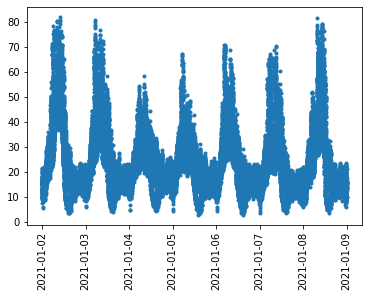

In [16]:
plt.plot(data_gps.Date_Time,data_gps.TEC_TOW,'.')
plt.xticks(rotation=90)

In [17]:
data_gps=data_gps.groupby(['Time']).apply(lambda gdf: gdf.assign(avg_TEC=lambda gdf: gdf['TEC_TOW'].mean()))#.droplevel(0)

(array([18629., 18630., 18631., 18632., 18633., 18634., 18635., 18636.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

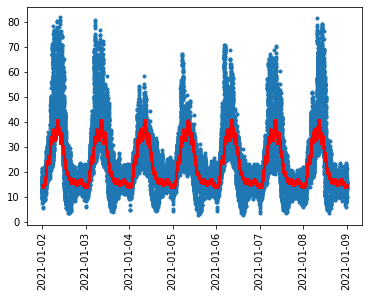

In [18]:
plt.plot(data_gps.Date_Time,data_gps.TEC_TOW,'.')
plt.plot(data_gps.Date_Time,data_gps.avg_TEC,'r.',markersize=2)
plt.xticks(rotation=90)